In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
df = pd.read_csv('incidenti.csv',sep=',')
df.columns
df

,Protocollo,Anno,Data,Ora,Localita,NaturaIncidente,N_Illesi,N_Feriti,N_Riservata,N_Morti,Pedoni,Velocipedi,Ciclomotori_Motocicli,Mezzi_Pesanti,Localizzazione
0,2015/001778,2015,31/12/2015,09:45,BERGAMO VIA BORGO SANTA CATERINA in corrispond...,Scontro frontale/laterale DX fra veicoli in ma...,1,1,0,0,False,True,False,False,"(45.705351, 9.685985)"
1,2015/001775,2015,30/12/2015,22:20,BERGAMO VIA BORGO PALAZZO all'intersezione con...,Scontro frontale/laterale DX fra veicoli in ma...,3,0,0,0,False,False,True,False,"(45.691092, 9.701064)"
2,2015/001776,2015,30/12/2015,10:25,BERGAMO VIALE GIULIO CESARE in corrispondenza ...,Veicolo in marcia contro veicolo in sosta,1,0,0,0,False,False,True,False,"(45.704740, 9.678039)"
3,2015/001777,2015,30/12/2015,16:30,BERGAMO CIRCONV. MUGAZZONE curva sinistrorsa,Scontro laterale fra veicoli in marcia,5,0,0,0,False,False,False,False,"(45.686879, 9.686566)"
4,2015/001771,2015,30/12/2015,10:30,BERGAMO VIA SALVO D'ACQUISTO accesso area Agip,Tamponamento,1,1,0,0,False,False,False,False,"(45.690489, 9.647538)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28035,2002/000005,2002,02/01/2002,17:15,BERGAMO VIA BORGO PALAZZO INGRESSO PIAZZALE ME...,Scontro laterale fra veicoli in marcia,1,1,0,0,False,False,True,False,"(45.689149, 9.707887)"
28036,2002/000001,2002,01/01/2002,14:30,BERGAMO ROTONDA DEI MILLE all'intersezione con...,Scontro laterale fra veicoli in marcia,3,0,0,0,False,False,False,False,"(45.695564, 9.667067)"
28037,2002/000002,2002,01/01/2002,15:15,BERGAMO VIA LOCATELLI in corrispondenza del ci...,Veicolo in marcia contro veicolo in sosta,1,0,0,0,False,False,False,False,"(45.700979, 9.665733)"
28038,2002/000036,2002,01/01/2002,11:55,BERGAMO LARGO PORTA NUOVA all'intersezione sem...,Scontro frontale/laterale DX fra veicoli in ma...,2,0,0,0,False,False,False,False,"(45.694365, 9.671010)"


## 1.1

In [2]:
#lunghezza dataset
len(df.index)

28040

## 1.3

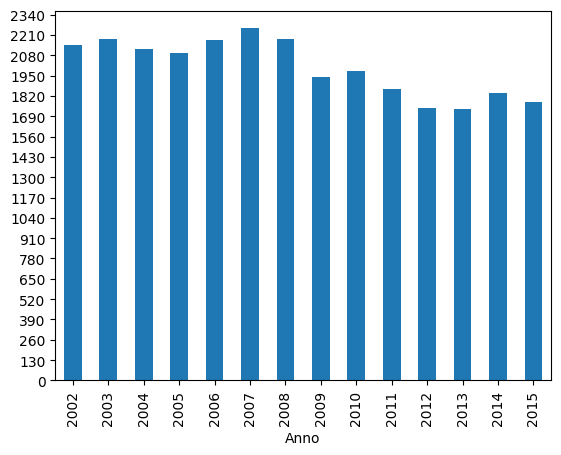

In [3]:
# Contare i valori della colonna 'Anno' e ordinare l'indice
anno_counts = df['Anno'].value_counts().sort_index()
# Creare il grafico a barre con gli anni ordinati
ax = anno_counts.plot.bar()
# Impostare gli step dell'asse y a intervalli di 500
y_max = anno_counts.max()  # trovare il valore massimo dell'asse y
plt.yticks(range(0, y_max + 130, 130))
# Mostrare il grafico
plt.show()

In [4]:
# Frequenza assoluta degli anni --> incidenti per anno

ipa = pd.crosstab(index=df['Anno'],columns=['FA'],colnames=['asd'])
ipa.describe()

asd,FA
count,14.000000
mean,2002.857143
std,183.750607
min,1738.000000
25%,1846.250000
50%,2036.000000
75%,2170.000000
max,2251.000000


Come mostrato dalla crosstab, abbiamo un numero max di incidenti pari a 2251 ed un minimo di 1738 incidenti. La media di incidenti annuali è di 2002 e la deviazione standard è pari a 183.750

## 1.4

In [5]:
ctf = pd.crosstab(index=df['N_Feriti'],columns=['Val Rel'],colnames=[''],normalize=True)
ctf

,Val Rel
N_Feriti,
0,0.501676
1,0.398930
2,0.074750
3,0.016084
4,0.005528
5,0.001961
6,0.000571
7,0.000357
8,0.000071


## 1.5

 Visualizzare tale tabella attraverso un grafico, in modo che sia facile vedere qual e (approssimativamente) la
 probabilita che, a seguito di un incidente, vi sia almeno un ferito

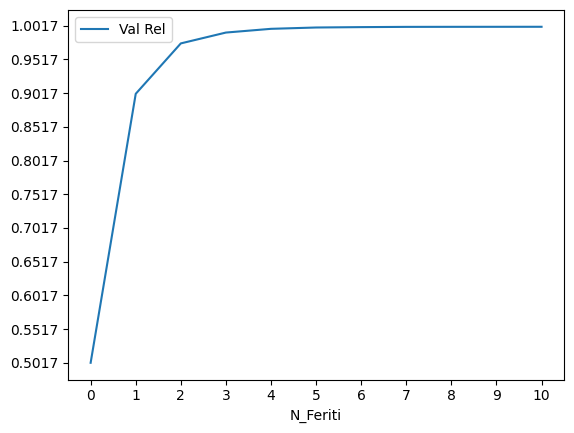

In [6]:
ctf.cumsum().plot()
max_val_y = ctf.cumsum().max().max()
min_val_y = ctf.cumsum().min().min()
plt.yticks(np.arange(min_val_y, max_val_y + 0.05, 0.05))
max_val_x=max(df['N_Feriti'])
plt.xticks(np.arange(0,max_val_x + 1,1))
plt.show()

In [7]:
ctf.cumsum()

,Val Rel
N_Feriti,
0,0.501676
1,0.900606
2,0.975357
3,0.991441
4,0.996969
5,0.998930
6,0.999501
7,0.999857
8,0.999929


La probabilità di avere almeno un ferito in seguito ad un incidente è di circa 
1-P(0 feriti) =
1 - (0.501676)

In [8]:
str((1-0.501676)*100)+"%"

'49.8324%'

## 1.6

In [9]:
ctf.cumsum()

,Val Rel
N_Feriti,
0,0.501676
1,0.900606
2,0.975357
3,0.991441
4,0.996969
5,0.998930
6,0.999501
7,0.999857
8,0.999929


## 1.7

In [10]:
df['N_Feriti'].mean()

0.6357703281027104

## 1.8 - 1.9

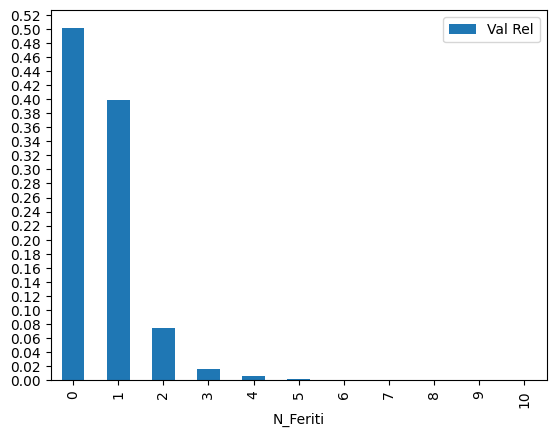

In [11]:
ctf.plot.bar()
plt.yticks(np.arange(0, ctf['Val Rel'].max() + 0.02, 0.02))
plt.show()

Il grafico delle Frequenze Relative del numero di feriti negli incidenti assomiglia al grafico della FMDP di un modello di distribuzione geometrico di parametro p.
In questo caso il parametro p rappresenta P("Almeno un ferito") e quindi alla probabilità calcolata precedentemente.
Ci troviamo quindi nel caso di X~G(0.498324)

In [12]:
df['N_Feriti'].describe()

count    28040.000000
mean         0.635770
std          0.790586
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: N_Feriti, dtype: float64

## 1.10

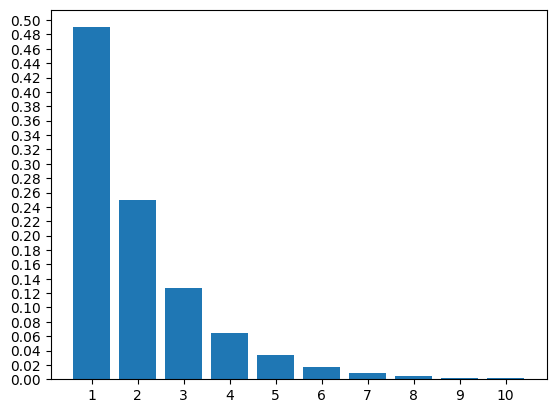

In [32]:
g = sp.geom(0.49)
x = np.arange(1, max(df['N_Feriti']) + 1, 1)
plt.yticks(np.arange(0, max(ctf['Val Rel']) + 0.02, 0.02))
plt.xticks(x)
plt.bar(x,g.pmf(x))
plt.show()

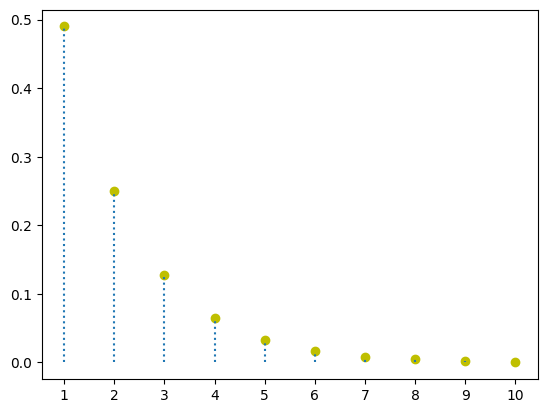

In [33]:
g = sp.geom(0.49)
x = np.arange(1, max(df['N_Feriti']) + 1, 1)
plt.plot(x, g.pmf(x), 'yo')
plt.xticks(x)
plt.vlines(x, 0, g.pmf(x), linestyles='dotted')
plt.show() 

## 1.11

<Axes: xlabel='N_Feriti', ylabel='N_Illesi'>

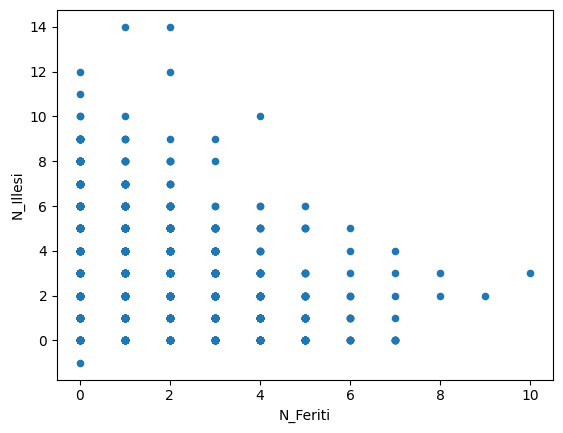

In [62]:
df.plot.scatter('N_Feriti','N_Illesi')

Il Grafico mostra che i dati di feriti e illesi per gli incidenti seguono una relazione leggermente inversamente proporzionale

## 1.12

Possiamo utilizzare l'indice di correlazione di pearson per determinare una eventuale correlazione tra i due caratteri

In [65]:
correlation = df['N_Feriti'].corr(df['N_Illesi'])
correlation

-0.3070519976103217

Questa leggera correlazione conferma l'interpretazione data precedentemente. Vi è una leggera tendenza dei dati ad essere inversamente proporzionali